In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import SimpleRNN, Input, Dense, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import Accuracy
from tensorflow import convert_to_tensor

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def show_loss(history):
    plt.figure()
    plt.plot(history.history['val_loss'], label="val loss")
    plt.plot(history.history['loss'],label="train loss")
    plt.title("Loss")
    plt.legend()

In [3]:
dataset = np.load(f'dataset.npz', allow_pickle=True)
samples_x, reference_y = dataset['X'], dataset['y']

#convert from sample time to ns
samples_x_ns = samples_x*156
reference_y_ns = reference_y*156


In [4]:
print(type(samples_x))
np.shape(samples_x)

<class 'numpy.ndarray'>


(19570, 64)

In [5]:
#split into train/test sets
#use samples_x_ns and reference_y_ns for ns inputs
x_train, x_test, y_train, y_test = train_test_split(samples_x, reference_y, test_size=0.2, random_state=42)


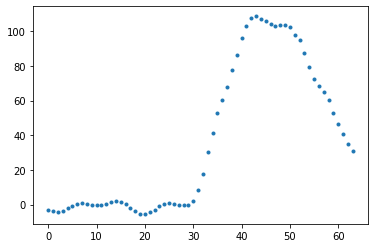

In [6]:
plt.plot(samples_x_ns[0],marker='.',linestyle='')
#samples_x_ns[0][40:45]

In [7]:
x_train.shape

(15656, 64)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 1)]           0         
_________________________________________________________________
RNN_layer (SimpleRNN)        (None, 64)                4224      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1409/1409 [==============================] - 18s 12ms/step - loss: 5.1229 - mean_absolute_error: 5.1229 - val_loss: 1.7152 - val_mean_absolute_error: 1.7150
Epoch 2/5
1409/1409 [==============================] - 20s 14ms/step - loss: 2.1873 - mean_absolute_error: 2.1873 - val_loss: 2.9075 - val_mean_absolute_error: 2.9074
Epoch 3/5
1409/1409 [==============================] 

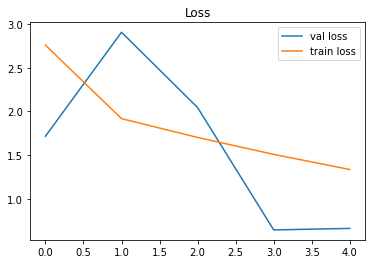

In [11]:
inputs = Input(shape=(64,1))
nn = SimpleRNN(64,activation='relu',name='RNN_layer')(inputs)
outputs = Dense(1)(nn)

opt = Adam()
loss = MeanAbsoluteError()

model = Model(inputs,outputs)
model.summary()
model.compile(optimizer=opt,loss=loss,metrics=[MeanAbsoluteError()])
history = model.fit(x_train,y_train,validation_split=0.1,epochs=5,batch_size=10)
show_loss(history)

In [10]:
MAE = MeanAbsoluteError()
acc = Accuracy()
#images_test_conv = np.reshape(images_test,(len(images_test),28,28,1))
y_pred = model.predict(x_test)
loss = MAE(
	convert_to_tensor(y_test),
	convert_to_tensor(y_pred)).numpy()
accValue = MAE(y_test,y_pred).numpy()

print("Test Loss:",loss,"Test Accuracy:",accValue)


Test Loss: 0.73469555 Test Accuracy: 0.9173739


In [ ]:
##compare DNN performance to CFD
##quantify DNN performance: histogram of MAE?
##compare network results with *scaled* (to ns) samples (save weights and run network on scaled samples)